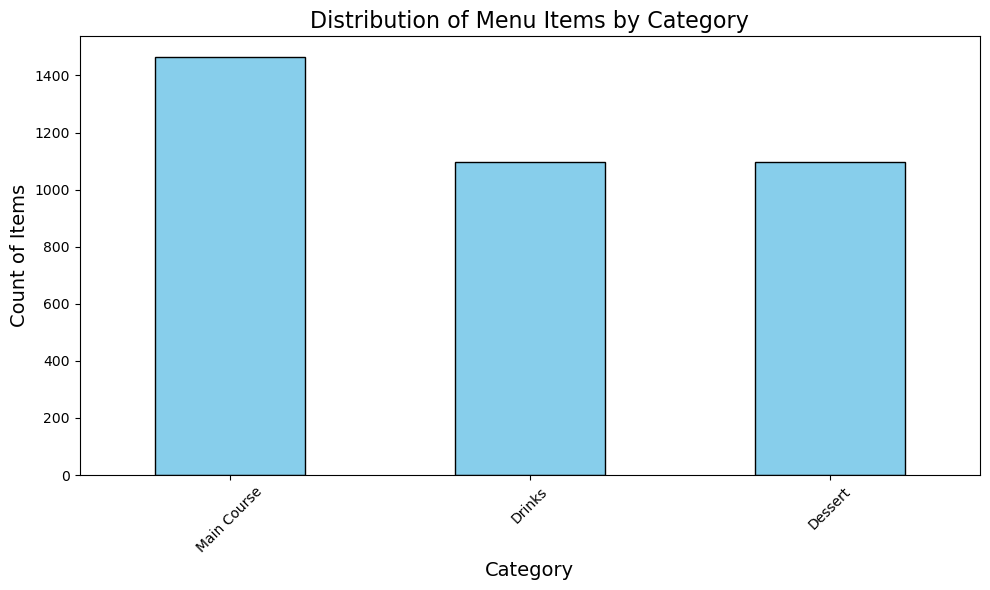

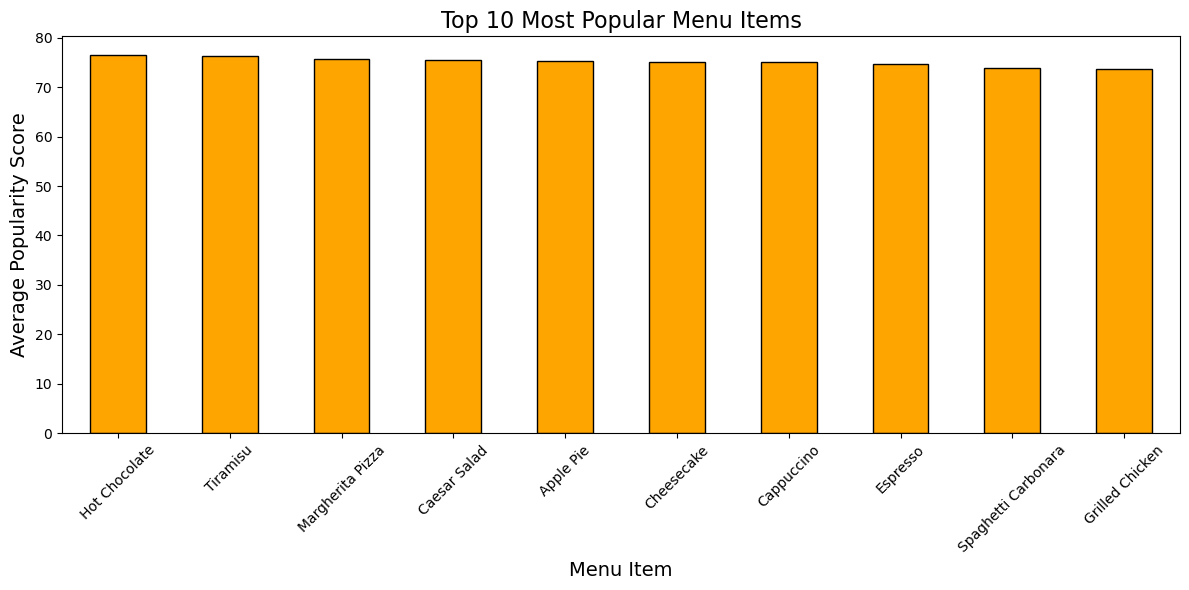

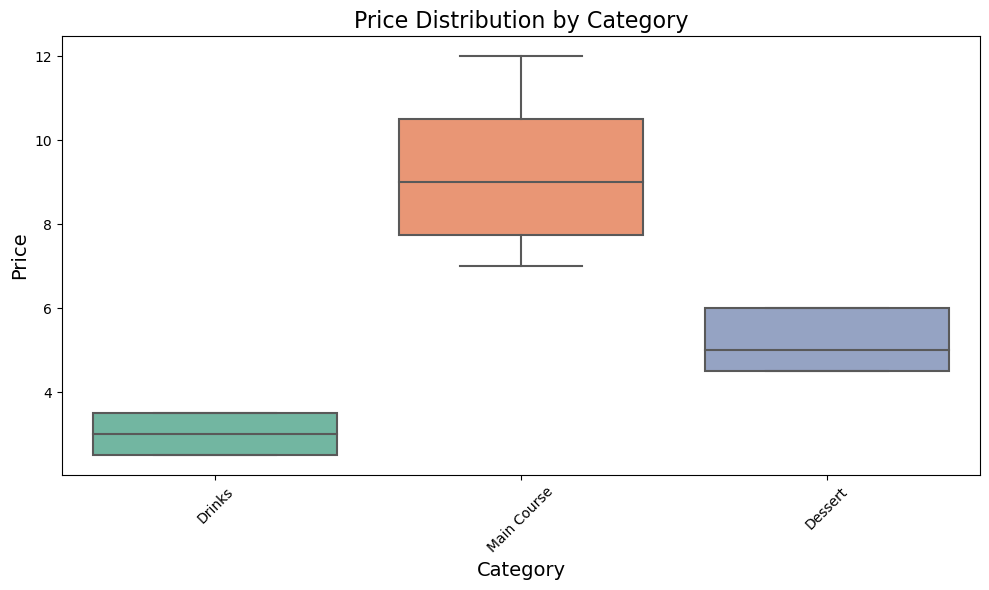

Average Price by Category:
Category
Dessert        5.166667
Drinks         3.000000
Main Course    9.250000
Name: Price, dtype: float64

Underperforming Categories:
Category
Main Course    74.675546
Name: Popularity, dtype: float64

Recommendations:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = r"C:\Users\conta\Desktop\Task 3 files\restaurant_menu_data.csv"
data = pd.read_csv(file_path)

# 1. Assess the distribution of menu items by category
plt.figure(figsize=(10, 6))
data['Category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Menu Items by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count of Items', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Highlight the most popular menu items based on the popularity score
popular_items = data.groupby('Menu Item')['Popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
popular_items.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Popular Menu Items', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Average Popularity Score', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Evaluate pricing patterns across categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=data, palette='Set2')
plt.title('Price Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price adjustments
avg_price_by_category = data.groupby('Category')['Price'].mean()
print("Average Price by Category:")
print(avg_price_by_category)

# 4. Recommend new menu items or promotional strategies based on insights
# Identify underperforming categories
category_popularity = data.groupby('Category')['Popularity'].mean()
low_performance = category_popularity[category_popularity < category_popularity.mean()]
print("\nUnderperforming Categories:")
print(low_performance)

# Recommendations
recommendations = []
if 'Drinks' in low_performance.index:
    recommendations.append("Introduce seasonal or signature drinks to boost popularity.")
if 'Dessert' in low_performance.index:
    recommendations.append("Offer combo deals including desserts to increase sales.")

print("\nRecommendations:")
for rec in recommendations:
    print(f"- {rec}")

# Save recommendations to a text file
with open("menu_recommendations.txt", "w") as file:
    file.write("Recommendations Based on Data Analysis:\n")
    for rec in recommendations:
        file.write(f"- {rec}\n")
